# 데이터 정제

데이터는 2013-01-01 부터 2017-08-15 까지 있음

In [20]:
import pandas as pd
data = pd.read_csv('./../data/sales_raw.csv')

data = data[['date','store_nbr','family','sales']]
data.columns = ['ds', 'store_id', 'product_id', 'y']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['product_id'] = encoder.fit_transform(data['product_id'])
data['ds'] = pd.to_datetime(data['ds'], infer_datetime_format=True)
data.to_csv('./../data/sales_modified.csv')

In [7]:
import pandas as pd

data = pd.read_csv('./../data/sales_modified.csv', index_col=0)
data = data[(data['store_id'] == 2) & (data['product_id'] == 2)]
data

,ds,store_id,product_id,y
365,2013-01-01,2,2,0.0
2147,2013-01-02,2,2,3.0
3929,2013-01-03,2,2,2.0
5711,2013-01-04,2,2,3.0
7493,2013-01-05,2,2,9.0
...,...,...,...,...
2992343,2017-08-11,2,2,8.0
2994125,2017-08-12,2,2,7.0
2995907,2017-08-13,2,2,10.0
2997689,2017-08-14,2,2,7.0


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -3.13756
          ds
0 2017-08-16
1 2017-08-17
2 2017-08-18
3 2017-08-19
4 2017-08-20
5 2017-08-21
6 2017-08-22
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4951.67   0.000350397        130.99      0.1879      0.1879      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4953.04    0.00302507       255.259           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       4953.26   7.33535e-05       119.364   2.005e-07       0.001      309  LS failed, Hessian reset 
     288       4953.83   0.000133144       176.196   1.566e-06       0.001      443  LS failed, Hessian reset 
     299       4953.85   4.73941e-05       77.4306      0.4792      0.4792      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


          ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2017-08-16  6.968581    1.624315   10.301017     6.968581     6.968581   
1 2017-08-17  6.969494    1.039497    9.695469     6.969494     6.969494   
2 2017-08-18  6.970408    1.523389   10.228681     6.970408     6.970408   
3 2017-08-19  6.971321    3.213427   12.073586     6.971321     6.971321   
4 2017-08-20  6.972234    3.877070   12.910566     6.972234     6.972234   
5 2017-08-21  6.973147    1.827955   10.864634     6.973147     6.973147   
6 2017-08-22  6.974060    1.686626   10.292543     6.974060     6.974060   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -0.861128             -0.861128             -0.861128 -0.601586   
1       -1.426986             -1.426986             -1.426986 -1.120314   
2       -1.209672             -1.209672             -1.209672 -0.864528   
3        1.230234              1.230234              1.230234  1.604318   
4        1.49567

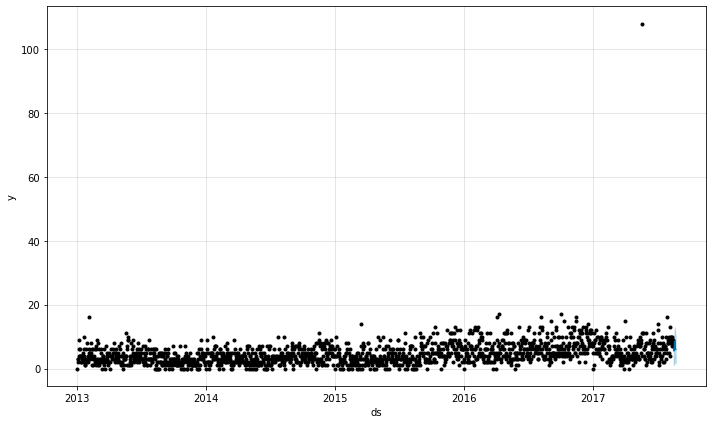

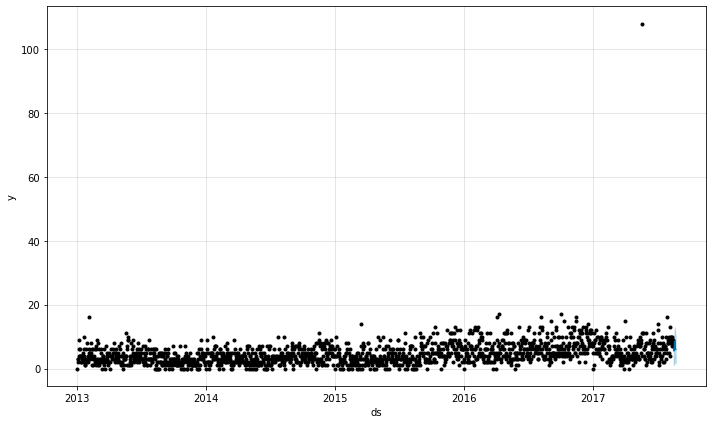

In [8]:
from prophet import Prophet

prophet = Prophet()
prophet.fit(data)

future = prophet.make_future_dataframe(periods=7, freq='D',include_history=False)
print(future)
forecast = prophet.predict(future)
# print(forecast[['ds', 'yhat','yhat_lower','yhat_upper']])
print(forecast)
print(sum(forecast['yhat']))
prophet.plot(forecast)

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


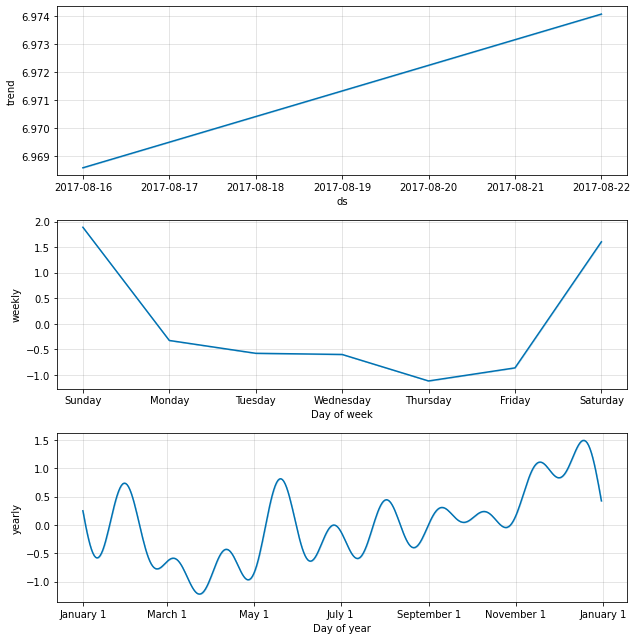

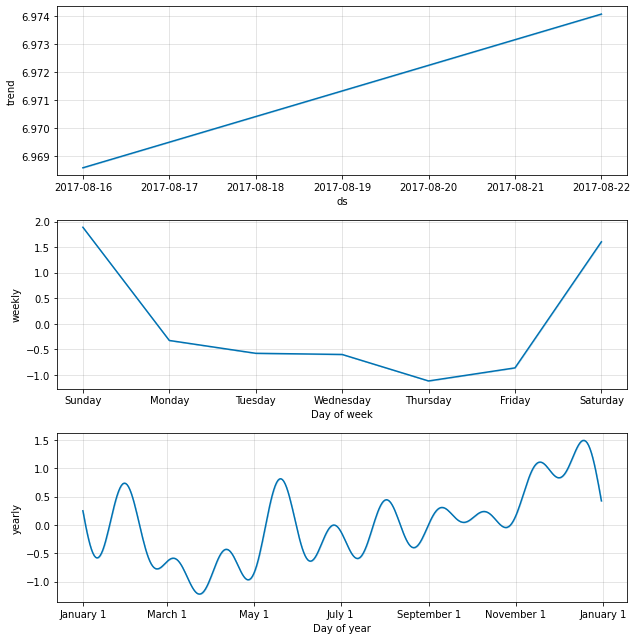

In [9]:
prophet.plot_components(forecast)

In [10]:
pred = forecast.loc[items[0].shape[0]:][['ds','yhat']]
pred

NameError: name 'items' is not defined